In [100]:
from matplotlib.pylab import *
from jax import lax, random, numpy as jnp
from flax import linen as nn
from matplotlib.pylab import *
from jax import lax, random, numpy as jnp
from flax import linen as nn
import numpy as np
from typing import Any, Callable, Optional, Tuple, Type, List
from jax import lax, random, numpy as jnp
import ml_collections
import einops

import optax
from flax.training import train_state  # Useful dataclass to keep train state

import h5py
import jax

In [101]:
import imageio.v3 as iio

im = iio.imread('imageio:chelsea.png')
im.shape

(300, 451, 3)

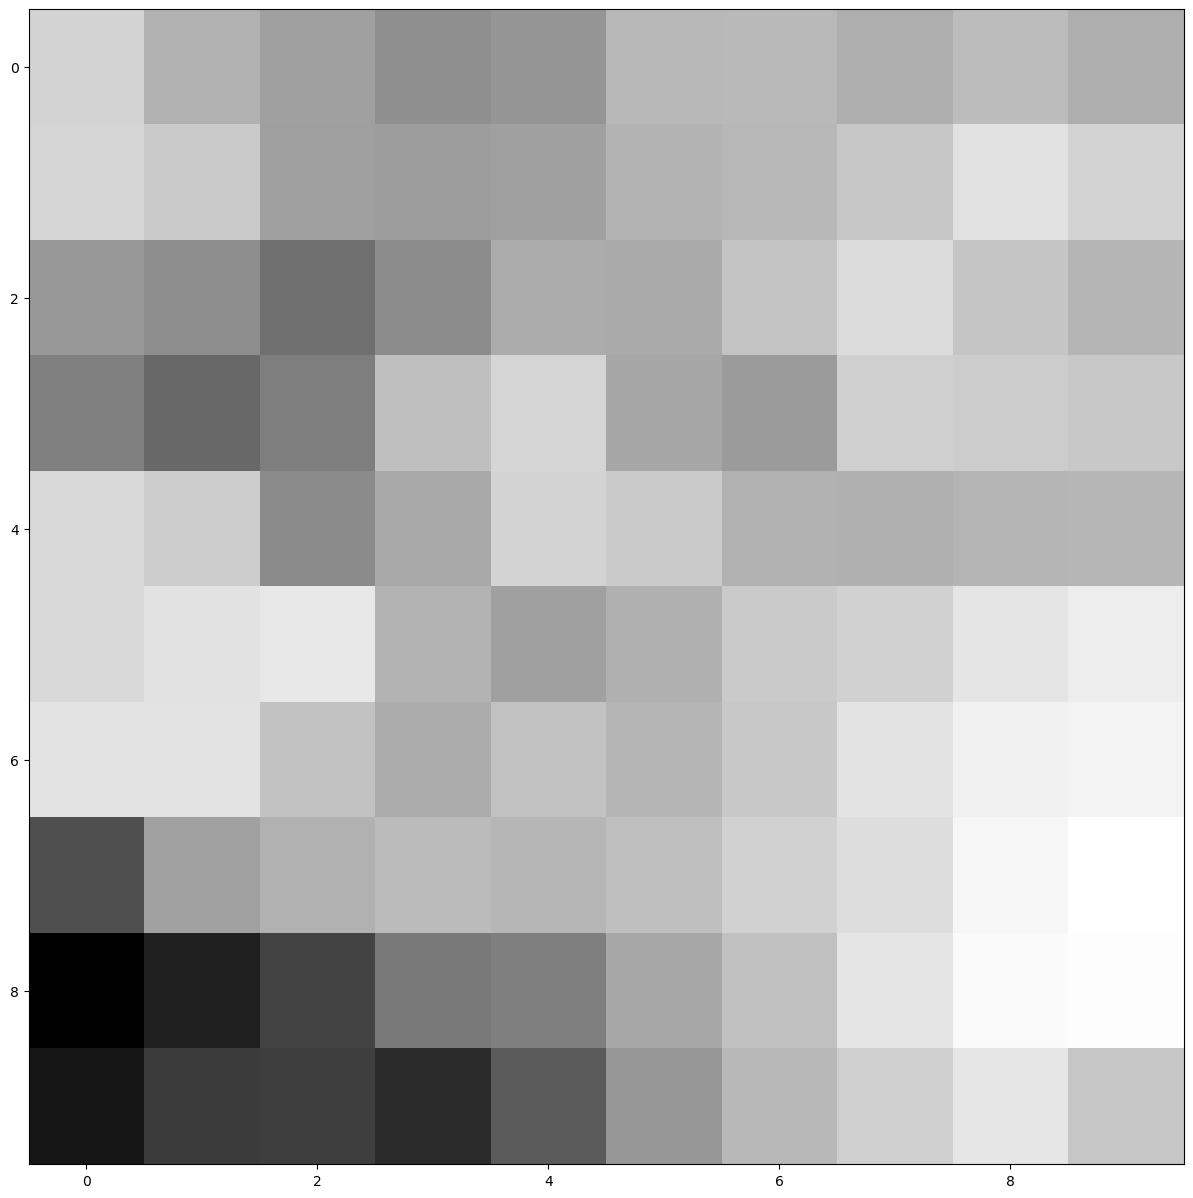

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import jax
im = iio.imread('imageio:chelsea.png')

plt.figure(figsize=(15, 15))
# plt.set_cmap("gray")
im=jnp.round(jax.image.resize(im, (100,100,3), "linear")).astype(int)
im = jnp.mean(im,axis=-1)
plt.imshow(im[20:30,20:30])
plt.show()

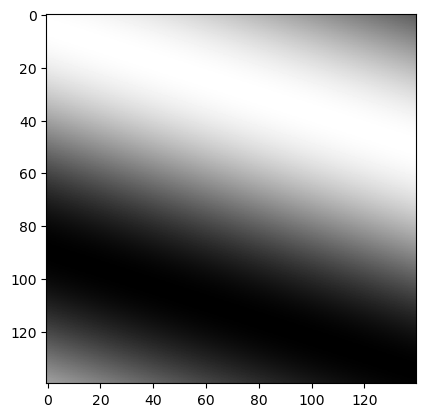

In [103]:
import numpy as np
import matplotlib.pyplot as plt



x = jnp.arange(-70, 70, 1)
X, Y = jnp.meshgrid(x, x)
wavelength = 50
alpha = jnp.pi*1.6
beta = jnp.pi*1.6
shift_x=0
shift_y=0
grating = jnp.sin(
    2*jnp.pi*(X*jnp.cos(alpha+shift_x)*jnp.cos(beta+shift_x) + Y*jnp.sin(alpha+shift_y)*jnp.cos(beta+shift_y)) / wavelength
)
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

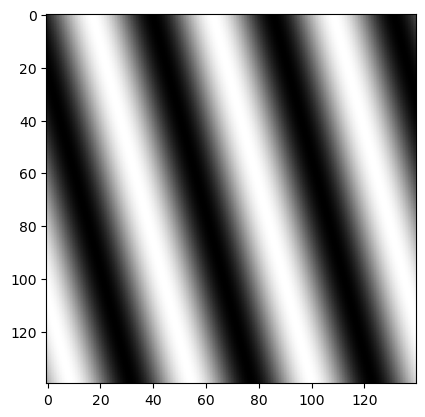

In [104]:
import numpy as np
import matplotlib.pyplot as plt



x = jnp.arange(-70, 70, 1)
X, Y = jnp.meshgrid(x, x)
wavelength = 50
alpha = jnp.pi*1.6
beta = jnp.pi*1.6
shift_x=1
shift_y=0
grating = jnp.sin(
    2*jnp.pi*(X*(jnp.cos(alpha)*jnp.cos(beta)+shift_x) + Y*(jnp.sin(alpha)*jnp.cos(beta) +shift_y)) / wavelength
)
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()
# print(X[0,:])
# print(Y[:,0])
# Y.shape

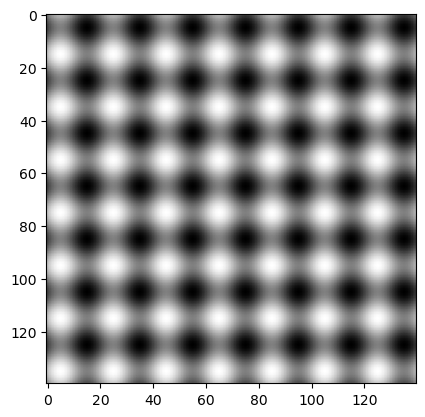

In [112]:
def get_3d_grating_to_scan(wavelength, alphaa,betaa,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z):
        alpha = jnp.pi*alphaa
        beta = jnp.pi*betaa
        x_mul = jnp.cos(alpha)*jnp.cos(beta)
        y_mul= jnp.sin(alpha)*jnp.cos(beta)
        z_mul = jnp.sin(beta)
        grating = (jnp.sin(
                2*jnp.pi*(((X*x_mul)+shift_x) + ((Y*y_mul)+shift_y) +((Z*z_mul) +shift_z))/ wavelength
                        )*amplitude)+shift_amplitude
        return grating


x = jnp.arange(-70, 70, 1)
X, Y,Z = jnp.meshgrid(x, x,x)
wavelength = 20
amplitude=1
shift_x=20
shift_y=20
shift_z=0
shift_amplitude=0
alpha = 1.0
beta =1.5
grating_a=get_3d_grating_to_scan(wavelength, alpha,beta,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z)

wavelength = 20
amplitude=1
shift_x=0
shift_y=0
shift_z=0
shift_amplitude=0
alpha = 1.0
beta =1.0
grating_b=get_3d_grating_to_scan(wavelength, alpha,beta,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z)

plt.set_cmap("gray")
plt.imshow(np.array(grating_a)[1,:,:]+grating_b[1,:,:])
plt.show()

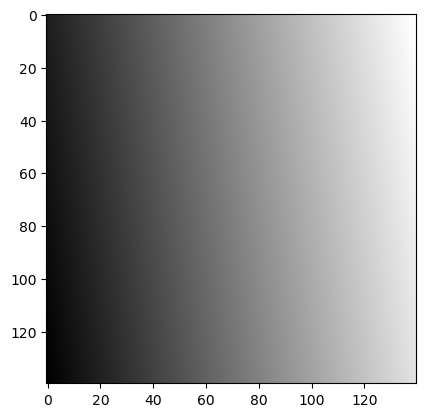

In [109]:
def get_3d_grating_vals(wavelength, alphaa,betaa,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z):
        alpha = jnp.pi*alphaa
        beta = jnp.pi*betaa
        x_mul = jnp.cos(alpha)*jnp.cos(beta)
        y_mul= jnp.sin(alpha)*jnp.cos(beta)
        z_mul = jnp.sin(beta)
      
        return x_mul, y_mul, z_mul

def get_3d_grating(wavelength, x_mul_a,x_mul_b, y_mul_a,y_mul_b, z_mul_a,z_mul_b ,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z):

        grating = (jnp.sin(
                2*jnp.pi*(  ((X*x_mul_a)+shift_x)*x_mul_b+shift_x
                          + ((Y*y_mul_a)+shift_y)*y_mul_b+shift_y
                           +((Z*z_mul_a) +shift_z)*z_mul_b+shift_z
                           )/ wavelength
                        )*amplitude)+shift_amplitude
        return grating


x = jnp.arange(-70, 70, 1)
X, Y,Z = jnp.meshgrid(x, x,x)
wavelength = 20
amplitude=1
shift_x=0
shift_y=0
shift_z=0
shift_amplitude=0
alpha = 1.0
beta =1.5
x_mul_a, y_mul_a, z_mul_a =get_3d_grating_vals(wavelength, alpha,beta,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z)

wavelength = 20
amplitude=1
shift_x=0
shift_y=0
shift_z=0
shift_amplitude=0
alpha = 1.0
beta =1.0
x_mul_b, y_mul_b, z_mul_b=get_3d_grating_vals(wavelength, alpha,beta,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z)

x_mul_a, y_mul_a, z_mul_a

grating=get_3d_grating(wavelength, x_mul_a,x_mul_b, y_mul_a,y_mul_b, z_mul_a,z_mul_b,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z)
plt.set_cmap("gray")
plt.imshow(np.array(grating)[1,:,:])
plt.show()

In [ ]:
def get_3d_grating_to_scan(wavelength, alphaa,betaa,amplitude,shift_x,shift_y,shift_z, shift_amplitude,X,Y,Z):
        """
        creating 3d wave sinusoidal grating of given properties
        X,Y,Z are taken from the meshgrid
        """
        alpha = np.pi*alphaa
        beta = np.pi*betaa
        grating = (np.sin(
        2*np.pi*(((X*np.cos(alpha)*np.cos(beta))+shift_x) + (Y*np.sin(alpha)*np.cos(beta)+shift_y) +(Z*np.sin(beta)) +shift_z)/ wavelength
          )*amplitude)+shift_amplitude
        return grating



def cumsum(res, el):
    """
    - `res`: The result from the previous loop.
    - `el`: The current array element.
    """
    res = res + el
    return res, res  # ("carryover", "accumulated")


result_init = 0
final, result = lax.scan(cumsum, result_init, a)
result

class Sinusoidal_grating_3d(nn.Module):
        """
        getting sinusoidal gratings that after adding will create the texture given parameters
        parameters would be the directon of the grating - described by 2 angles; wavelength and amplitude
        In order to enforce the order of the frequencies/wavelength in each grating to be decreasing (it will make later comparison easier)
        we will not learn the frequencies themself, but the diffrences between each frequency - so the biggest frequency will be the cumulative sum
        of all

        my idea later of comparing diffrent descriptors would be to look at each grating pair - and first check how much angles 
        are simmilar than multiply it by wavelength in the end summ all of the vector weighted by amplitude (not perfect idea but some)
        shifts by design would not be taken into account when comparing
        """
        cfg: ml_collections.config_dict.config_dict.ConfigDict


        @nn.compact
        def __call__(self,sv_area_ids: jnp.ndarray,sv_id: jnp.ndarray,image_part: jnp.ndarray) -> jnp.ndarray:

                # [0] wavelength, [1] alphaa, [2 ]betaa, [3] amplitude, [4] shift_x, [5] shift_y, [6] shift_z, [7] shift_amplitude
                params_grating = self.param('params_grating',
                        nn.initializers.lecun_normal(),(self.cfg.num_waves,1))

                wavelength = 50
                alpha = np.pi*1.5
                beta = np.pi*1.5

                grating = np.sin(
                2*np.pi*(X*np.cos(alpha)*np.cos(beta) + Y*np.sin(alpha)*np.cos(beta) +Z*np.sin(beta)) / wavelength
                )

                return generated_texture_single
                        # generated_texture_single = self.param('shape_param_single_s_vox',
                #         self.kernel_init,(self.diameter))


v_Texture_sv=nn.vmap(Texture_sv
                            ,in_axes=(0, 0,0)
                            ,variable_axes={'params': None} #parametters are shared
                            ,split_rngs={'params': True,'texture' :True}
                            )

IndentationError: expected an indented block after function definition on line 9 (1288181673.py, line 12)